In [ ]:
## Prophet Model to predict fore

[*********************100%***********************]  1 of 1 completed


23:23:17 - cmdstanpy - INFO - Chain [1] start processing
23:23:17 - cmdstanpy - INFO - Chain [1] done processing


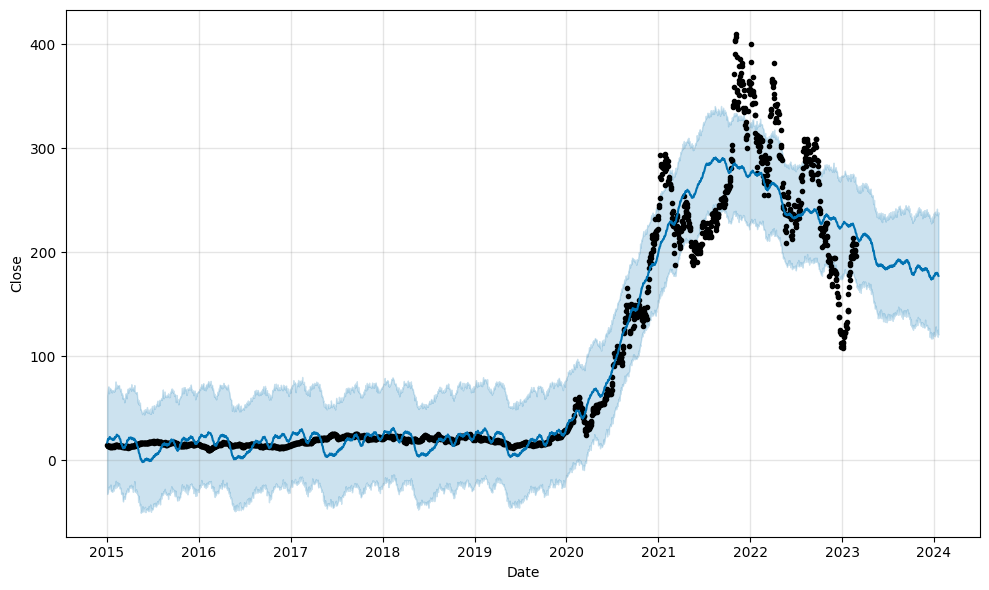

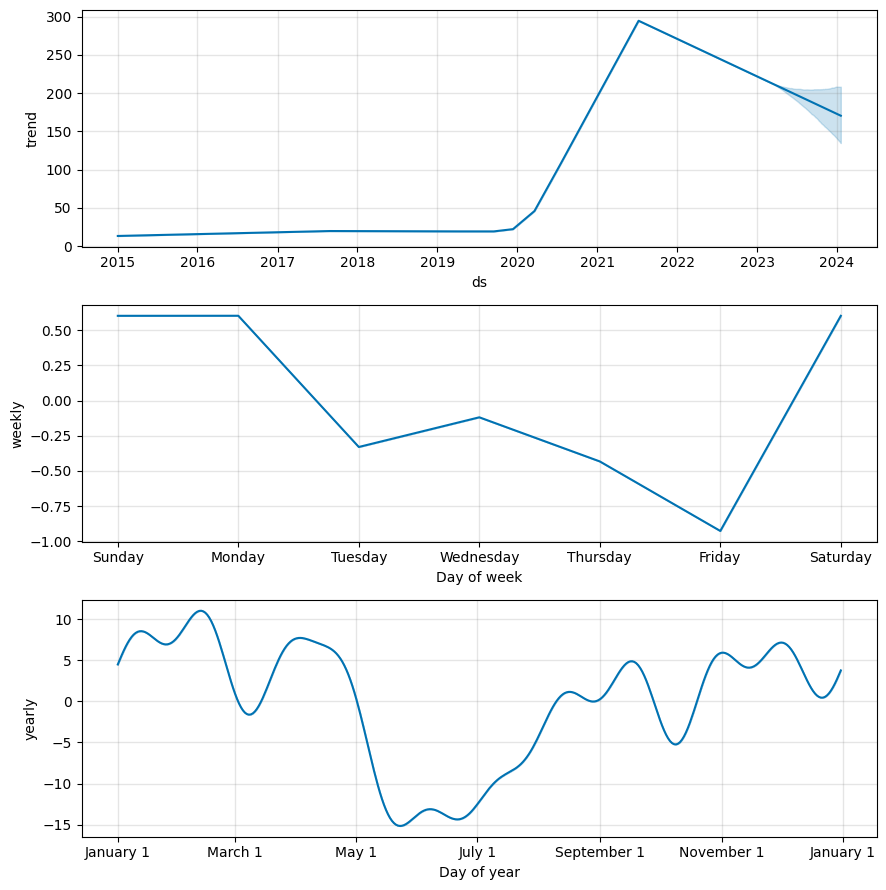

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# load the data
df = yf.download('TSLA', start='2010-06-29', end='2023-02-28')
tesla_data.index = pd.to_datetime(tesla_data.index)

df = df[['Close']].reset_index()
df.columns = ['ds', 'y']
df = df[df['ds'] >= '2015-01-01'] # use data from 2015

# create and fit the Prophet model
model = Prophet(interval_width=0.90)
model.fit(df)

# create a dataframe with future dates
future_dates = model.make_future_dataframe(periods=1081, freq='D', include_history=True)

# filter future dates to predict only till 2024-01-19
future_dates = future_dates[future_dates['ds'] <= '2024-01-19']

# make predictions for the future dates
forecast = model.predict(future_dates)

# plot the forecast
model.plot(forecast, xlabel='Date', ylabel='Close')
model.plot_components(forecast)

plt.show()


In [17]:
last_prediction = forecast.iloc[-1]
lower_bound = last_prediction['yhat_lower']
upper_bound = last_prediction['yhat_upper']

last_prediction

ds                            2024-01-19 00:00:00
trend                                  170.455599
yhat_lower                             121.092149
yhat_upper                             238.454923
trend_lower                            134.748816
trend_upper                            208.356281
additive_terms                           6.918777
additive_terms_lower                     6.918777
additive_terms_upper                     6.918777
weekly                                  -0.926789
weekly_lower                            -0.926789
weekly_upper                            -0.926789
yearly                                   7.845566
yearly_lower                             7.845566
yearly_upper                             7.845566
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   177.374376
Name: 2377, dtype: object

## 90 % confidence interval 122 to 238, with mean prediction at 178